## ETF price-volume relationship  

To compare the difference between industries, we selected 5 sectors.  
SPDR sector   
* Industry: XLI  
* Medical & Health: XLV  
* Technology: XLK  
* Energy: XLE  
* Financial: XLF  
* Market: SPY

#ishares = [IYJ,IYH,IYW,IYE,IYF,IVV]  

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv('industry_etf.csv')
df1.rename(columns={'Attributes':'Date'}, inplace=True)
df1 = df1.drop(index=1)
df1.set_index('Date', inplace=True)
df1.head()

,open,open.1,open.2,open.3,open.4,open.5,open.6,open.7,open.8,open.9,...,volume.13,volume.14,volume.15,volume.16,volume.17,volume.18,volume.19,volume.20,volume.21,volume.22
Date,,,,,,,,,,,,,,,,,,,,,
Symbols,DIA,IBB,IHE,IVV,IYC,IYE,IYF,IYH,IYJ,IYW,...,SMH,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLV,XLY
2015-05-01,163.1623,112.1416,159.572,193.3584,137.3856,41.8783,82.9459,142.585,101.3966,103.277,...,4147980,103399711,6749902,11354599,18331079,11017898,10548396,5158317,11508332,6110220
2015-05-04,164.1911,114.1163,161.801,195.0461,139.4599,42.0398,83.1967,144.2683,102.4823,104.5713,...,2730157,70927235,4150209,14434247,22232282,6096265,7698750,6710241,8561748,3920894
2015-05-05,164.0909,113.9607,162.4527,194.8443,139.1238,42.1476,83.6984,144.5301,102.3123,104.092,...,6141065,113326156,3761331,16076343,30639814,10026905,8104890,6537353,11373760,7856800
2015-05-06,163.7631,113.1596,160.9226,193.4776,137.7025,41.7616,83.4011,143.5762,101.6515,102.951,...,4481110,135060151,5015558,16388582,29753265,8247719,9873883,6233272,10152164,8298192


In [5]:
# set plot type
plt.rcParams['figure.figsize'] = (18, 4)
font = {'family': 'Segoe Script', 'weight': 'normal', 'size': 15}
plt.rc('font',**font)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.unicode_minus']=False # show minus

In [24]:
spdr = [18,21,19,16,17] # SPDR selected ETF(Industry, Medical & Health, Tech, Energy, Financial, Market)
ishares = [8,7,9,5,6] # ishares 

def plot(): 
    for i in spdr:
        fig=plt.figure()
        
        i = str(i)
        plt.title(df1['close.'+i][0])
        
        close = df1['close.'+i][1:].astype(float)
        volume = df1['volume.'+i][1:].astype(float)
        volatility = close.pct_change().rolling(14).std()

        color = 'limegreen'
        print(df1['close.'+i][0]+'  close & volume corr  '+str(close[5:].corr(volume[:-5]))+
                  '  close_volatility & volume corr  '+str(volatility.corr(volume[:-14])))
            
        close.plot(label='close',color='red')    
        volume.plot(label='volume', secondary_y=True, color=color)
        
        handles,labels = [],[]
        for ax in fig.axes:
            for h,l in zip(*ax.get_legend_handles_labels()):
                handles.append(h)
                labels.append(l)

        plt.legend(handles,labels,loc=9)

XLI  close & volume corr  -0.025064525845797197  close_volatility & volume corr  0.25650739607693596
XLV  close & volume corr  -0.206937915734153  close_volatility & volume corr  0.5088152097326759
XLK  close & volume corr  0.22712902436837445  close_volatility & volume corr  0.4486786155771856
XLE  close & volume corr  -0.4872028622271172  close_volatility & volume corr  0.5866232133242503
XLF  close & volume corr  0.151435053759464  close_volatility & volume corr  0.2875794517874078


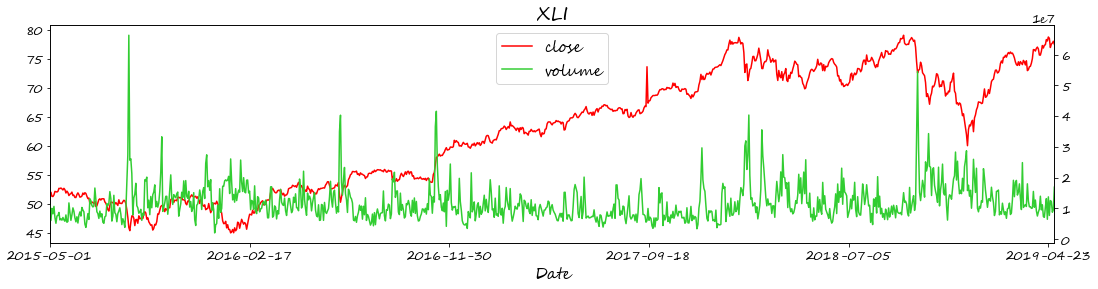

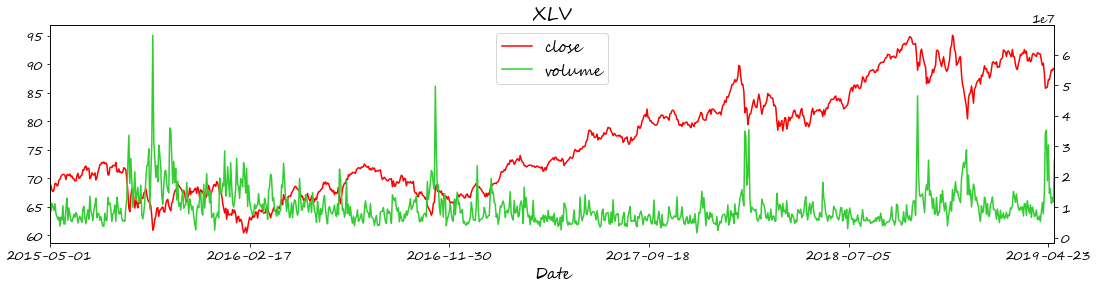

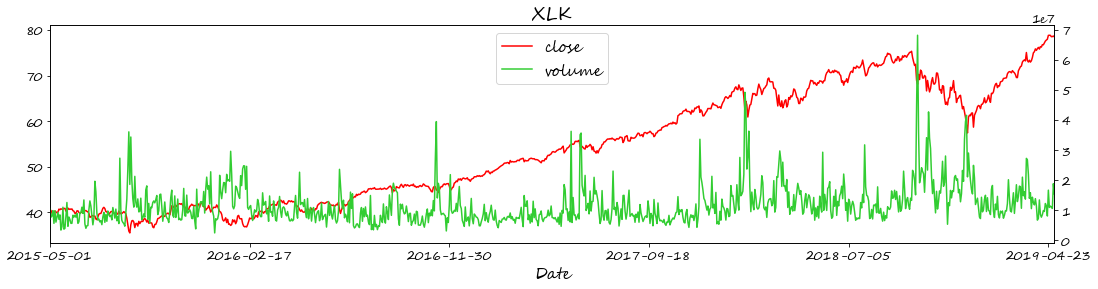

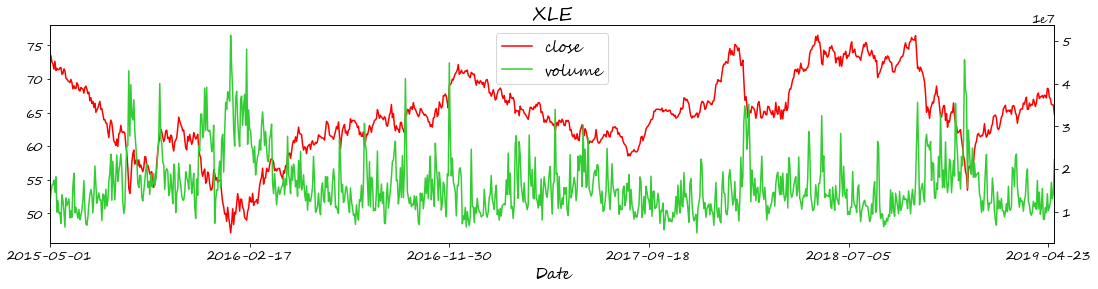

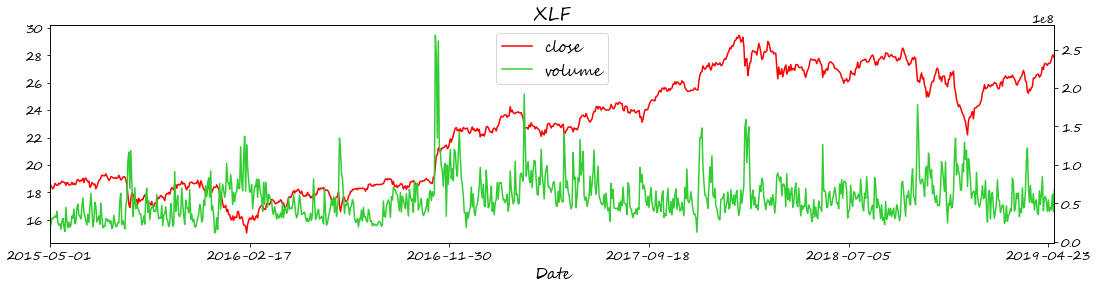

In [25]:
plot()

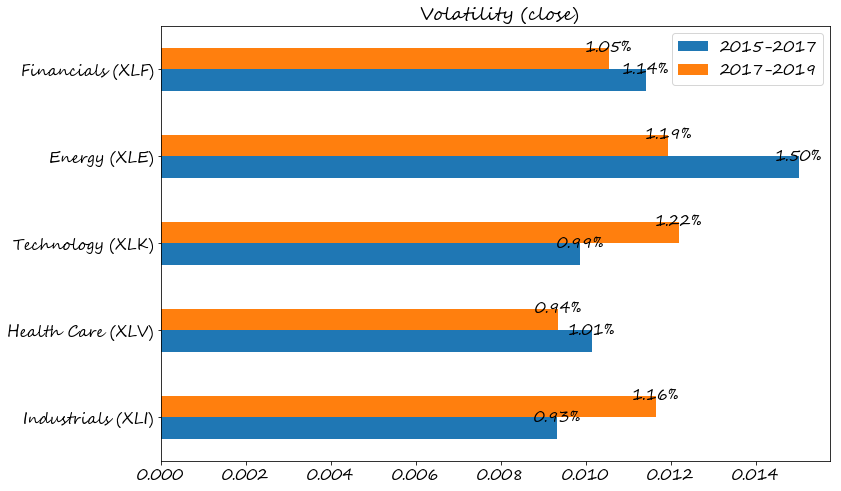

In [130]:
# volatility
import math
spdr_sym = ['Industrials (XLI)','Health Care (XLV)','Technology (XLK)','Energy (XLE)','Financials (XLF)']
ishares_sym = ['Industrials (IYJ)','Health Care (IYH)','Technology (IYW)','Energy (IYE)','Financials (IYF)']
def volatility_p(data):
    vol_1 = [] # 2015-2017 volatitlity
    vol_2 = [] # 2017-2019 volatitlity
    for i in spdr:
        d = {'log_': np.log(df1[data+'.'+str(i)][1:].astype(float)/df1[data+'.'+str(i)][1:].astype(float).shift(1))}
        vol = pd.DataFrame(data=d)

        vol['log_roll'] = vol['log_'].rolling(7).std()
        vol['annual'] = vol['log_roll']*math.sqrt(255)
    
        vol_1.append(vol['log_'].loc['2015-05-04':'2017-05-04'].std())
        vol_2.append(vol['log_'].loc['2017-05-04':'2019-05-04'].std())

    df_v = pd.DataFrame({'2015-2017': vol_1, '2017-2019': vol_2}, index=spdr_sym)
    ax = df_v.plot.barh(figsize=(12,8),fontsize=15,title=(' Volatility ('+data+')'))

    # add annotation
    for p in ax.patches:
        width = p.get_width()
        plt.text(p.get_width(), p.get_y()+p.get_height(),
             '{:.2%}'.format(width),ha='center', va='center')
volatility_p('close')

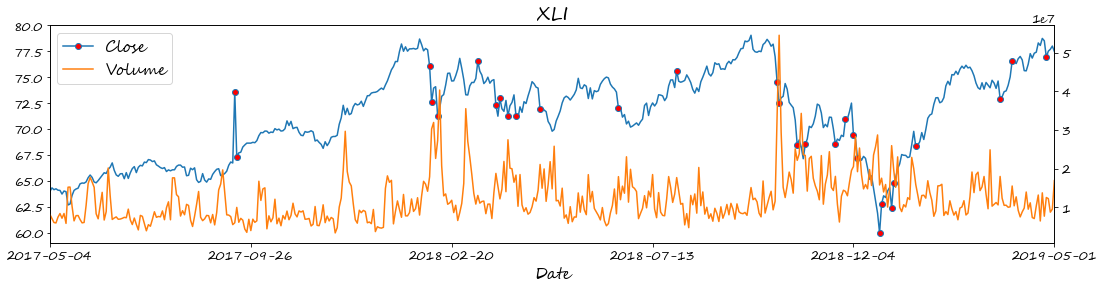

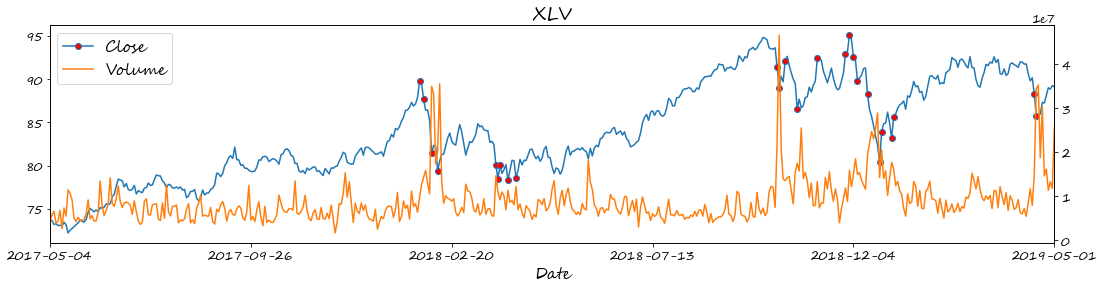

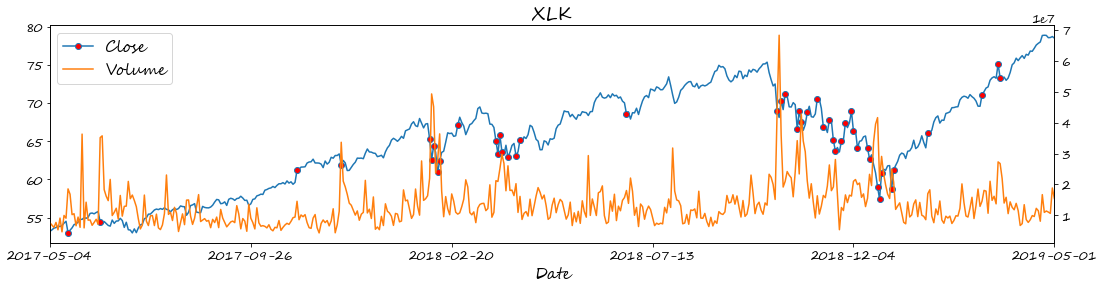

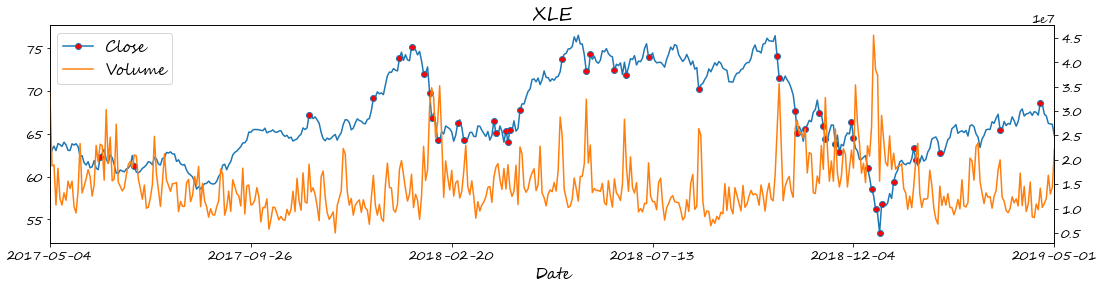

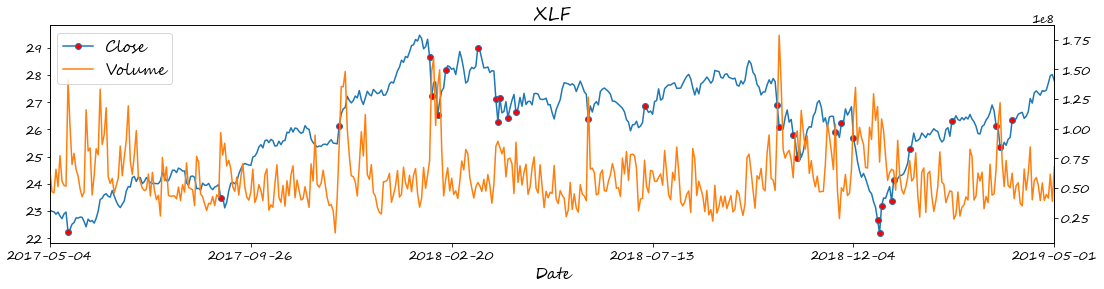

In [131]:
avg_pct_ch = []
def pv_vola():
    for i in spdr:
        mark_on = []
        fig=plt.figure()
        plt.title(df1['close.'+str(i)][0])
        close = df1['close.'+str(i)][1:].loc['2017-05-04':'2019-05-04'].astype(float)
        volume = df1['volume.'+str(i)][1:].loc['2017-05-04':'2019-05-04'].astype(float)
        pct = close.pct_change()
        
        # highlight the day which price has steep change 
        for i in pct[abs(pct) > 0.02].index:
            mark_on.append(pct.index.get_loc(i))
        
        close.plot(markevery=mark_on, marker='o', markerfacecolor='r',label='Close')
        
        after_pct = []
        for j in range(len(mark_on)):
            after_pct.append(abs(volume[mark_on[j]+1:(mark_on[j]+8)].pct_change()).mean())
   
        after_pct = [after_pct for after_pct in after_pct if str(after_pct) != 'nan']
        avg_pct_ch.append(sum(after_pct)/len(after_pct))
        
        volume.plot(secondary_y=True,label='Volume')
        
        handles,labels = [],[]
        for ax in fig.axes:
            for h,l in zip(*ax.get_legend_handles_labels()):
                handles.append(h)
                labels.append(l)

        plt.legend(handles,labels,loc=2)

pv_vola()

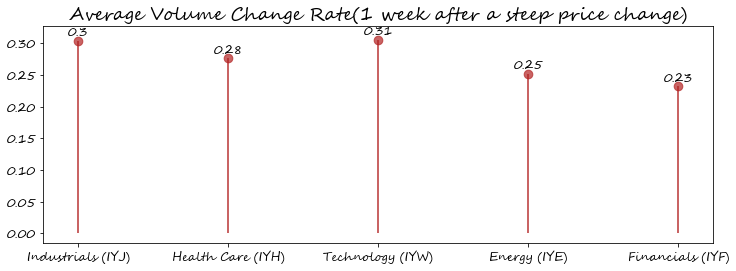

In [132]:
af_pct = pd.DataFrame({'avgpct':avg_pct_ch}, index=ishares_sym)
# plot average volume percentage 
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Average Volume Change Rate(1 week after a steep price change)', fontdict={'size':18})
ax.vlines(x=af_pct.index, ymin=0, ymax=af_pct.avgpct, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=af_pct.index, y=af_pct.avgpct, s=75, color='firebrick', alpha=0.7)
    
# annotate
for row in af_pct.itertuples():
    ax.text(row.Index, row.avgpct+.003, s=round(row.avgpct, 2), 
            horizontalalignment= 'center', verticalalignment='bottom', fontsize=12)


[Python TA-Lib](https://kknews.cc/zh-tw/other/x2zpk4r.html)  
[pandas-statistics](https://pythonprogramming.net/pandas-statistics-correlation-tables-how-to/)  
[量價關係分析](https://kknews.cc/zh-tw/other/x2zpk4r.html)  
[股市技術分析利器之TA-Lib（一）](https://kknews.cc/zh-tw/other/pyyvkjz.html)  
[stock_market_indicators](https://github.com/voice32/stock_market_indicators/blob/master/indicators.py)  
[most-volatile-sectors](https://www.investopedia.com/financial-edge/0712/the-8-most-volatile-sectors.aspx)  
[4-volatile-industries](https://www.timothysykes.com/blog/4-volatile-industries-and-some-common-events/)  
[What-sector-of-the-stock-market-is-the-least-volatile](https://www.quora.com/What-sector-of-the-stock-market-is-the-least-volatile)  
[bar-chart-annotations](https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html)  
[pythonvisualization](http://liyangbit.com/pythonvisualization/matplotlib-top-50-visualizations/#16-%E6%A3%92%E6%A3%92%E7%B3%96%E5%9B%BE-lollipop-chart)  

In [16]:
#df = pd.read_csv('data0.csv')
#df[['Close','Volume']].plot(secondary_y = ['Volume'])